In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier ,StackingClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix 
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("cleaned_titanic_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,Ticket,single_price,Fare,Cabin,Embarked
0,0,1,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,A/5 21171,3.62500,7.2500,no info,S
1,1,2,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,PC 17599,35.64165,71.2833,C85,C
2,2,3,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,STON/O2. 3101282,7.92500,7.9250,no info,S
3,3,4,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,113803,26.55000,53.1000,C123,S
4,4,5,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,373450,8.05000,8.0500,no info,S


In [4]:
df.shape

(891, 18)

In [5]:
df = df.drop(["Unnamed: 0" , "PassengerId" , "Ticket" , "Fare" , "Cabin"] , axis=1 )

In [6]:
df.head()

,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,single_price,Embarked
0,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,False,3.62500,S
1,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,False,35.64165,C
2,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,True,7.92500,S
3,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,False,26.55000,S
4,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,True,8.05000,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   surname       891 non-null    object 
 3   title         891 non-null    object 
 4   name          891 non-null    object 
 5   Sex           891 non-null    object 
 6   Age           714 non-null    float64
 7   SibSp         891 non-null    int64  
 8   Parch         891 non-null    int64  
 9   total_member  891 non-null    int64  
 10  is_alone      891 non-null    bool   
 11  single_price  891 non-null    float64
 12  Embarked      891 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 84.5+ KB


In [8]:
df["is_alone"] = df["is_alone"].replace([True , False],[1 , 0])

C:\Users\jayde\AppData\Local\Temp\ipykernel_7608\2898731408.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["is_alone"] = df["is_alone"].replace([True , False],[1 , 0])


In [9]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [10]:
df["Embarked"] = df["Embarked"].replace(["S" , "C" , "Q"] , [1,2,3])

C:\Users\jayde\AppData\Local\Temp\ipykernel_7608\4028230878.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Embarked"] = df["Embarked"].replace(["S" , "C" , "Q"] , [1,2,3])


In [11]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [14]:
df.head()

,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,single_price,Embarked
0,0,3,Braund,Mr,Owen Harris,male,22.0,1,0,2,0,3.62500,1
1,1,1,Cumings,Mrs,John Bradley,female,38.0,1,0,2,0,35.64165,2
2,1,3,Heikkinen,Miss,Laina,female,26.0,0,0,1,1,7.92500,1
3,1,1,Futrelle,Mrs,Jacques Heath,female,35.0,1,0,2,0,26.55000,1
4,0,3,Allen,Mr,William Henry,male,35.0,0,0,1,1,8.05000,1


In [15]:
df["Sex"] = df["Sex"].replace(["male" , "female"] , [1,2])

C:\Users\jayde\AppData\Local\Temp\ipykernel_7608\2507339118.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace(["male" , "female"] , [1,2])


### model training

In [51]:
df.head()

,Survived,Pclass,surname,title,name,Sex,Age,SibSp,Parch,total_member,is_alone,single_price,Embarked
0,0,3,Braund,Mr,Owen Harris,1,22.0,1,0,2,0,3.62500,1
1,1,1,Cumings,Mrs,John Bradley,2,38.0,1,0,2,0,35.64165,2
2,1,3,Heikkinen,Miss,Laina,2,26.0,0,0,1,1,7.92500,1
3,1,1,Futrelle,Mrs,Jacques Heath,2,35.0,1,0,2,0,26.55000,1
4,0,3,Allen,Mr,William Henry,1,35.0,0,0,1,1,8.05000,1


In [81]:
df.loc[433]

Survived                      0
Pclass                        3
surname                  Kallio
title                        Mr
name             Nikolai Erland
Sex                           1
Age                        17.0
SibSp                         0
Parch                         0
total_member                  1
is_alone                      1
single_price              7.125
Embarked                      1
Name: 433, dtype: object

In [52]:
X = df.drop(["surname","title","name" , "Survived"],axis=1)

In [53]:
y = df["Survived"]

In [54]:
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2 , random_state = 42)

In [79]:
X_test

,Pclass,Sex,Age,SibSp,Parch,total_member,is_alone,single_price,Embarked
709,3,1,29.699118,1,1,3,0,5.081933,2
439,2,1,31.000000,0,0,1,1,10.500000,1
840,3,1,20.000000,0,0,1,1,7.925000,1
720,2,2,6.000000,0,1,2,0,16.500000,1
39,3,2,14.000000,1,0,2,0,5.620850,2
...,...,...,...,...,...,...,...,...,...
433,3,1,17.000000,0,0,1,1,7.125000,1
773,3,1,29.699118,0,0,1,1,7.225000,2
25,3,2,38.000000,1,5,7,0,4.483929,1
84,2,2,17.000000,0,0,1,1,10.500000,1


In [56]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
y = lr.predict(X_test)
print(accuracy_score(y_test , y))
print(classification_report(y_test , y))
print(confusion_matrix(y_test , y))

0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[90 15]
 [21 53]]


C:\Users\jayde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
svc = SVC()
svc.fit(X_train , y_train)
y = svc.predict(X_test)
print(accuracy_score(y_test , y))
print(classification_report(y_test , y))
print(confusion_matrix(y_test , y))

0.6536312849162011
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       105
           1       0.80      0.22      0.34        74

    accuracy                           0.65       179
   macro avg       0.72      0.59      0.55       179
weighted avg       0.70      0.65      0.59       179

[[101   4]
 [ 58  16]]


In [58]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train , y_train)
y = knn.predict(X_test)
print(accuracy_score(y_test , y))
print(classification_report(y_test , y))
print(confusion_matrix(y_test , y))

0.7150837988826816
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       105
           1       0.73      0.49      0.59        74

    accuracy                           0.72       179
   macro avg       0.72      0.68      0.68       179
weighted avg       0.72      0.72      0.70       179

[[92 13]
 [38 36]]


In [59]:
rf = RandomForestClassifier(
    n_estimators = 500,
    max_features = 0.5,
    max_samples = 0.5,
    max_depth = None
)
rf.fit(X_train , y_train)
y = rf.predict(X_test)
print(accuracy_score(y_test , y))
print(classification_report(y_test , y))
print(confusion_matrix(y_test , y))

0.8324022346368715
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

[[93 12]
 [18 56]]


<Axes: >

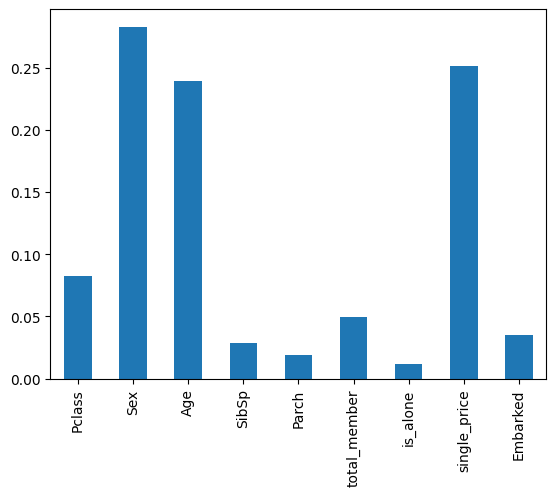

In [60]:
pd.Series(rf.feature_importances_ , index = X.columns).plot(kind="bar")

In [61]:
ad = AdaBoostClassifier(n_estimators = 1500 , learning_rate = 0.1)
ad.fit(X_train , y_train)
y = ad.predict(X_test)
print(accuracy_score(y_test , y))
print(classification_report(y_test , y))
print(confusion_matrix(y_test , y))

0.7877094972067039
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[89 16]
 [22 52]]


In [62]:
gb = GradientBoostingClassifier(
    n_estimators = 1500,
    learning_rate = 0.01
)
gb.fit(X_train , y_train)
y = gb.predict(X_test)
print(accuracy_score(y_test , y))
print(classification_report(y_test , y))
print(confusion_matrix(y_test , y))

0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.85      0.78      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.85      0.85      0.85       179

[[95 10]
 [16 58]]


In [63]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 1500)
xgb.fit(X_train , y_train)
y = xgb.predict(X_test)
print(accuracy_score(y_test , y))
print(classification_report(y_test , y))
print(confusion_matrix(y_test , y))

0.8324022346368715
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

[[93 12]
 [18 56]]


In [64]:
model = [("lr" , lr ),("rf",rf),("ad",ad),("xgb",xgb)]

In [65]:
vc = VotingClassifier(estimators = model , voting='hard')
vc.fit(X_train , y_train)
y = vc.predict(X_test)
print(accuracy_score(y_test , y))
print(classification_report(y_test , y))
print(confusion_matrix(y_test , y))

C:\Users\jayde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7988826815642458
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[93 12]
 [24 50]]


In [66]:
base_model = [("lr" , lr ),("rf" ,rf),("ad",ad)]

In [67]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, max_depth = 10, n_estimators = 1000)
sc = StackingClassifier(estimators = base_model ,final_estimator = xgb , cv=5)
sc.fit(X_train , y_train)
y = sc.predict(X_test)
print(accuracy_score(y_test , y))
print(classification_report(y_test , y))
print(confusion_matrix(y_test , y))

C:\Users\jayde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jayde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8379888268156425
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

[[94 11]
 [18 56]]


In [72]:
import pickle

pickle.dump(gb , open("Titanic.pkl" , "wb") )